## 线性回归 - 简介

线性回归将连续响应（因）变量与一个或多个预测变量（特征、自变量）相关联，并假设该关系本质上是线性的：
- 当我们保持其他特征不变时，每个特征和响应之间的关系是一条直线。
- 这条线的斜率不依赖于其他变量的值。
- 每个变量对响应的影响是相加的（但我们可以包含代表两个变量相互作用的新变量）。

换句话说，模型假设响应变量可以通过特征的线性组合来解释或预测，但这种线性关系的随机偏差除外。

## 导入和设置

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### 简单回归

#### 生成随机数据

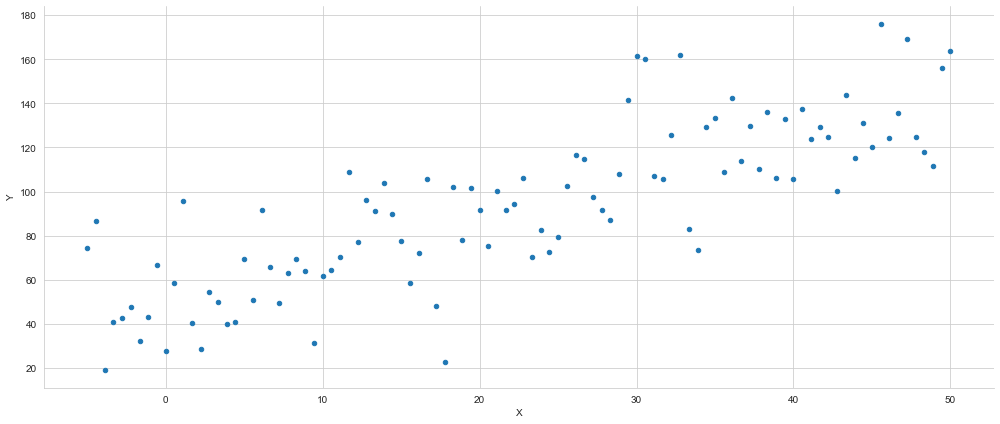

In [3]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

我们的左侧具有单个自变量的线性模型采用以下形式：

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ 解释了当我们的数据实际上不符合直线时我们会遇到的偏差或错误。当$\epsilon$具体化时，即当我们在实际数据上运行这种类型的模型时，错误被称为**残差**。

#### 使用 statsmodels 估计简单回归

摘要的上半部分显示了数据集特征，即估计方法、观测值和参数的数量，并表明标准误差估计不考虑异方差性。

中间面板显示了密切反映人工数据生成过程的系数值。我们可以确认使用 OLS 公式获得汇总结果中间显示的估计值：

In [4]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     195.9
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           4.15e-25
Time:                        15:36:03   Log-Likelihood:                -447.27
No. Observations:                 100   AIC:                             898.5
Df Residuals:                      98   BIC:                             903.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2689      3.689     13.898      0.0

#### 验证计算

In [5]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   51.27
X        1.87
dtype: float64

#### 显示模型和残差

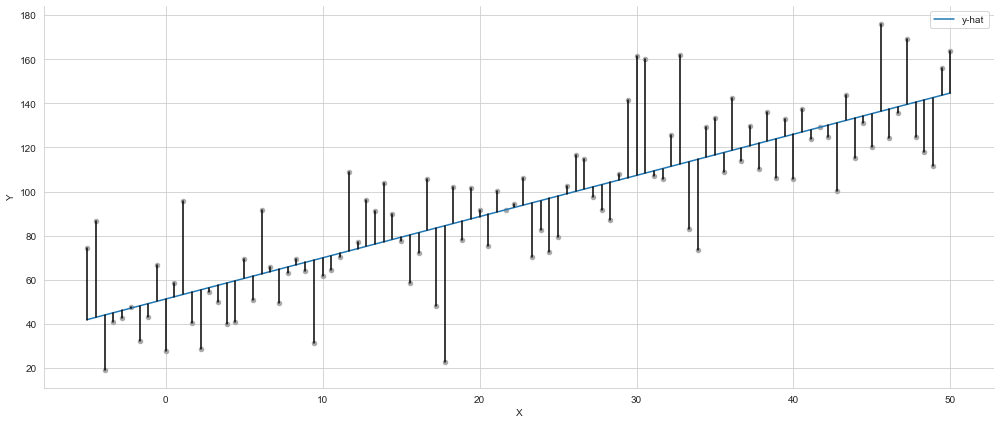

In [6]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout()

### 多重回归


对于两个自变量，模型简单地改变如下：

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

#### 生成新的随机数据

C:\Users\lipei\AppData\Local\Temp\ipykernel_1988\219448990.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')


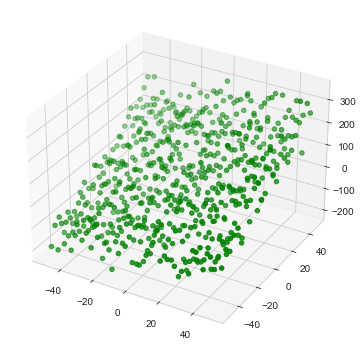

In [7]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
sns.despine()
plt.tight_layout();

In [8]:
X = data[['X_1', 'X_2']]
y = data['Y']

#### 使用 statsmodels 估计多元回归模型

面板的右上部分显示了刚刚讨论的拟合优度度量，以及拒绝所有系数均为零且不相关的假设的 F 检验。同样，t 统计量表明截距和斜率系数毫不奇怪地非常显着。

摘要的底部包含剩余诊断信息。左侧面板显示用于检验正态性假设的偏斜和峰度。 Omnibus 和 Jarque-Bera 检验均未能拒绝残差呈正态分布的原假设。 Durbin-Watson 统计检验了残差中的序列相关性，其值接近 2，在给定 2 个参数和 625 个观测值的情况下，该值无法拒绝无序列相关性的假设。

最后，条件数提供了有关多重共线性的证据：它是包含输入数据的设计矩阵的最大和最小特征值的平方根之比。值高于 30 表明回归可能具有显着的多重共线性。

In [9]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):          1.11e-207
Time:                        15:47:38   Log-Likelihood:                -3344.9
No. Observations:                 625   AIC:                             6696.
Df Residuals:                     622   BIC:                             6709.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6931      2.047     20.855      0.0

#### 验证计算

In [10]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   42.69
X_1      0.99
X_2      3.08
dtype: float64

#### 将输出保存为图像

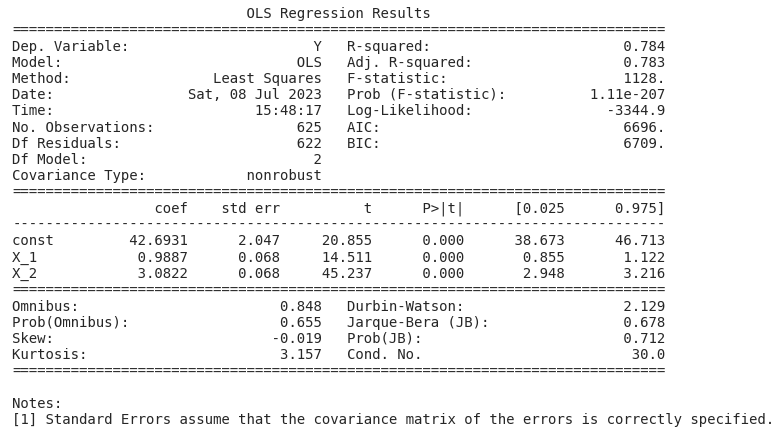

In [11]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

#### 显示模型和残差

下图说明了模型与随机生成的数据点拟合的超平面

C:\Users\lipei\AppData\Local\Temp\ipykernel_1988\3852472351.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')


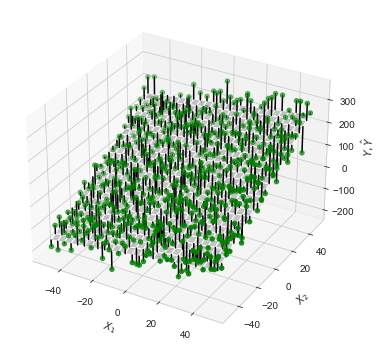

In [12]:
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

Additional [diagnostic tests](https://www.statsmodels.org/dev/diagnostic.html)

## 随机梯度下降回归

sklearn 库在其 Linear_models 模块中包含 SGDRegressor 模型。要使用这种方法学习同一模型的参数，我们需要首先对数据进行标准化，因为梯度对尺度敏感。

### 准备数据

梯度对尺度敏感，SGDRegressor 也是如此。使用“StandardScaler”或“scale”来调整功能。

为此，我们使用 StandardScaler() 在拟合步骤中计算每个输入变量的平均值和标准差，然后在变换步骤中减去平均值并除以标准差，我们可以在单个 fit_transform() 命令：

In [13]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

### 配置 SGDRegressor

然后我们使用默认值实例化 SGDRegressor，除了 random_state 设置以方便复制：

In [14]:
sgd = SGDRegressor(loss='squared_loss', 
                   fit_intercept=True, 
                   shuffle=True, 
                   random_state=42,
                   learning_rate='invscaling', 
                   eta0=0.01, 
                   power_t=0.25)

### 训练模型

现在我们可以拟合 sgd 模型，为 OLS 和 sgd 模型创建样本内预测，并计算每个模型的均方根误差：

In [15]:
# sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

d:\miniconda3\envs\ml4t\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


SGDRegressor(loss='squared_loss', random_state=42)

正如预期的那样，两个模型产生相同的结果。我们现在将开展一个更雄心勃勃的项目，使用线性回归来估计多因素资产定价模型。

In [16]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
pd.Series(coeffs, index=X.columns)

X_1     887.06
X_2   2,785.96
dtype: float64

In [17]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(sm.add_constant(X))})

In [18]:
resids.pow(2).sum().div(len(y)).pow(.5)

sgd   51.06
ols   51.06
dtype: float64

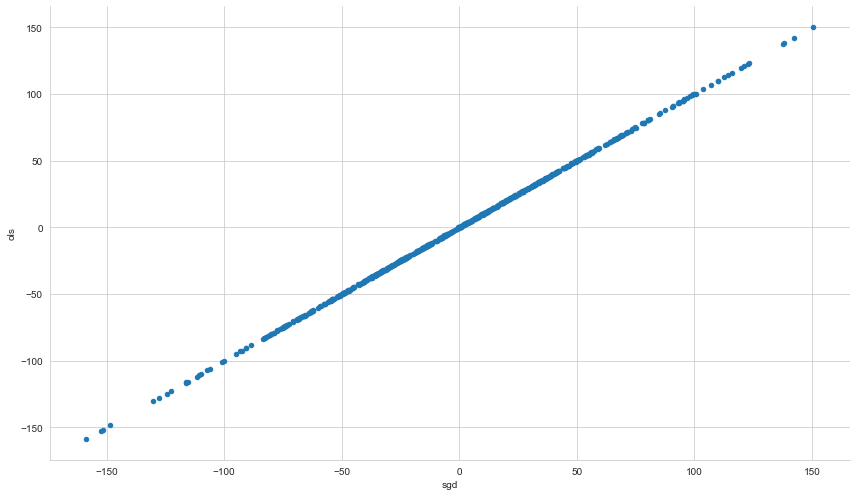

In [19]:
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();